<a href="https://colab.research.google.com/github/Subhajeet-Khawas/DeepLearningCampusX/blob/main/HandwritingDetectionANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

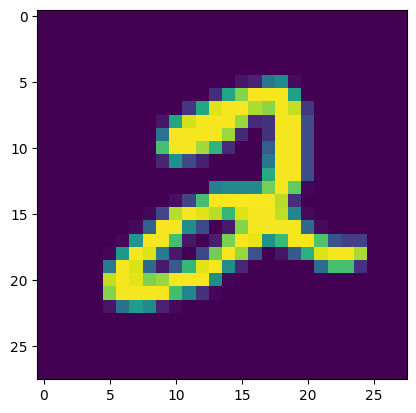

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
model=Sequential()

In [15]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [18]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 5ms/step - loss: 0.2778 - accuracy: 0.9195 - val_loss: 0.1382 - val_accuracy: 0.9602
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1122 - accuracy: 0.9670 - val_loss: 0.1068 - val_accuracy: 0.9681
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0773 - accuracy: 0.9770 - val_loss: 0.1098 - val_accuracy: 0.9662
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0578 - accuracy: 0.9819 - val_loss: 0.0881 - val_accuracy: 0.9729
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0955 - val_accuracy: 0.9726
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0943 - val_accuracy: 0.9760
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.1062 - val_accuracy

In [19]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [20]:
y_prob

array([[2.1065457e-13, 3.3031547e-14, 1.0991759e-11, ..., 9.9999994e-01,
        1.7335036e-14, 8.8727259e-10],
       [4.6348758e-26, 6.0070590e-13, 9.9999994e-01, ..., 1.7484757e-26,
        5.3752771e-19, 4.3417860e-35],
       [9.2963137e-15, 9.9999994e-01, 6.4157811e-11, ..., 9.0690799e-10,
        6.8318448e-11, 4.8701002e-15],
       ...,
       [2.0668518e-26, 4.3532215e-16, 2.8895356e-23, ..., 1.4996895e-15,
        6.1133231e-15, 2.0624412e-11],
       [6.6459587e-29, 5.5861117e-30, 3.5308194e-26, ..., 5.0415559e-28,
        1.5055748e-17, 2.2849642e-24],
       [3.0574355e-15, 1.1458442e-17, 9.1580019e-19, ..., 3.5108307e-28,
        7.5653768e-23, 1.1249906e-23]], dtype=float32)

In [21]:
y_pred=y_prob.argmax(axis=1)

In [22]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,y_pred)

0.9755

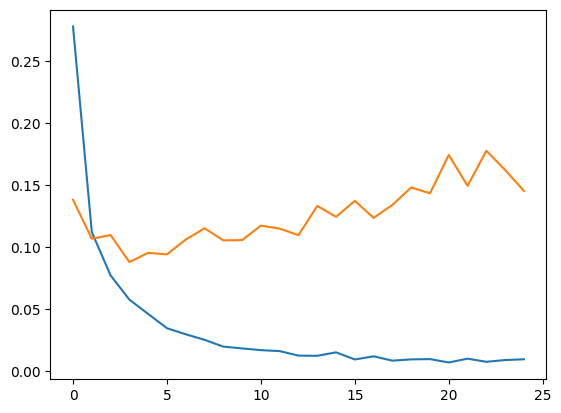

In [28]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

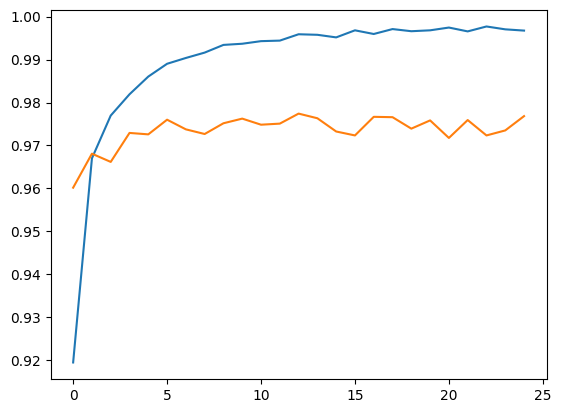

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

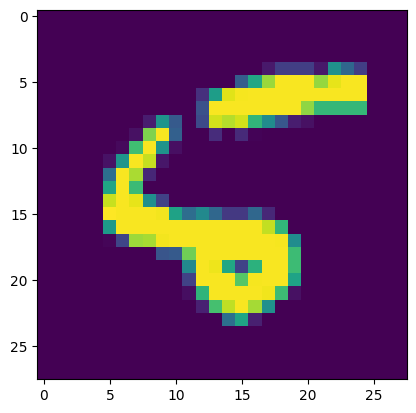

In [32]:
plt.imshow(X_test[8])

In [33]:
model.predict(X_test[8].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 33ms/step


array([6])